# Hey Julian and Ben

Thanks again for these two great meetings. I really liked talking to you guys and this Data Science position seems to be the perfect role for me and my working goals. 

As Julian mentioned, usually their is a short task to test the applicants skills. But because this is a whole new field of your company their is no such task available at the moment. So I decided to grab a dataset from Kaggle to show you a bit of my coding workflow.

Within this Notebook I want to show you my ability to work solution oriented and off course some coding skills. 

Please find the dataset I use under the following link:
https://www.kaggle.com/dustincm/chinese-delivery-drive
Unfortunatly I couldn't find a similar dataset to the data you are generating at parcelLab - But for now this delivery-drive-dataset should work too.

So I hope to see you guys soon and it would be an honour to me to support parcelLab to the next possible starting date.

Best wishes and more thin...I really hope to get one of those parcelLap-Snapbacks;),

Dennis



## So lets's get started - Get our packages ready

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data

In [211]:
df = pd.read_csv("data.csv")
df.head()

,Street_Address,Date,Tip,Phone_Number,Street_Address2,Race,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles
0,23 Kracke,07/05/16,3.00,8.438056e+09,B,W,F,R,19.83,R,11:58,NaN,Y,NaN,2.5
1,145 Bee,06/29/16,4.78,9.149805e+09,NaN,W,F,NaN,NaN,NaN,15:06,NaN,Y,NaN,1.6
2,Ashley River,07/07/16,NaN,8.435063e+09,NaN,NaN,NaN,NaN,12.93,C,21:34,NaN,NaN,NaN,2.0
3,6 Grove Street,6/1/2016,3.67,NaN,NaN,B,M,R,NaN,NaN,16:30,NaN,NaN,NaN,1.7
4,6 Grove Street,06/28/16,3.61,8.437938e+09,NaN,B,F,R,NaN,R,14:20,NaN,M,NaN,1.7


In [212]:
# How many columns do we have
def count_columns(df):
    col_count = len(df.columns)
    print(f"This dataset hast {col_count} columns")
    
count_columns(df)

This dataset hast 15 columns


In [213]:
# Looks like there are a couple of missing datapoints - lets have a look

def count_nan(df):
    # create a column_list to iterate over it
    col_list = list(df.columns)
    
    # also create an empty dictionary for plotting the missing values afterwards 
    missing_dict = {}
    
    # iterate over the list and find the number of missing values
    for col in col_list:
        missing = df[col].isna().sum()
        missing_dict.update({col:missing})
    return missing_dict
    
# Now...print the value together with the column name
print_missing = count_nan(df)
for k,v in print_missing.items():
    print(f"The column {k} has {v} missing values!")

The column Street_Address has 0 missing values!
The column Date has 0 missing values!
The column Tip has 101 missing values!
The column Phone_Number has 206 missing values!
The column Street_Address2 has 562 missing values!
The column Race has 109 missing values!
The column Gender has 109 missing values!
The column Type has 188 missing values!
The column Price has 204 missing values!
The column Payment_Type has 148 missing values!
The column Time_In has 57 missing values!
The column Time_Out has 310 missing values!
The column Age has 291 missing values!
The column Time_Elapsed has 315 missing values!
The column Miles has 0 missing values!


## Let's visualize the amount of missing data by using our created dictionary

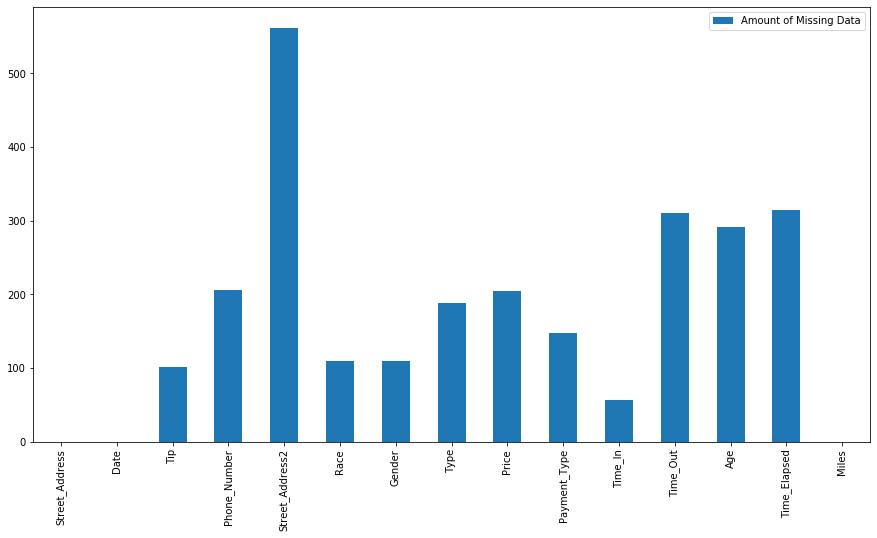

In [214]:
missing_df = pd.DataFrame(print_missing, index=["Amount of Missing Data"])
missing_df.T.plot(kind="bar", figsize=(15,8));

## Let's try to understand these results

First of all we can realize that there are 562 missing values within the feature "Street_Address2" - The whole dataset hast 772 rows so that are about 73% missing values. This is because most of the people just insert text into to feature "Street_Address" while they have no other further inoformation. Because of this high missing amount let's just remove this feature for now while the impact can't bee that high.

Let's also remove the column "Race" because of ethical reasons.

Another interesting fact can be realized within the features "Time_Out" and "Time_Elapsed". Of course if there is no time out stamped there won't be a time elapsed either. Thats why the amount of missing data of those features is nearly the same. The big question at this stage would be the following:
**If the feature "Time_Out" is missing does this mean that the food has not been delivered?**
This would be a question which we should answer with our customer.

Data exploration -> Creating Questions -> Answer Question -> Continue Data Science Workflow


In [215]:
# Lets delete the features "Race" and "Street_Address2"

df.drop(["Race", "Street_Address2"], axis=1, inplace=True)

In [216]:
df.columns

Index(['Street_Address', 'Date', 'Tip', 'Phone_Number', 'Gender', 'Type',
       'Price', 'Payment_Type', 'Time_In', 'Time_Out', 'Age', 'Time_Elapsed',
       'Miles'],
      dtype='object')

# Keep it simple for now

Because this is just a short analysis - let's keep it simple and replace all the missing values with the value 0

In [217]:
df.fillna(0, inplace=True)

In [218]:
# Let's check if we did it right by using our creted function count_nan

count_nan(df)

{'Street_Address': 0,
 'Date': 0,
 'Tip': 0,
 'Phone_Number': 0,
 'Gender': 0,
 'Type': 0,
 'Price': 0,
 'Payment_Type': 0,
 'Time_In': 0,
 'Time_Out': 0,
 'Age': 0,
 'Time_Elapsed': 0,
 'Miles': 0}

# Feature Engineering

# Let's have a look at the data types

As we know - machine learning models can only work with numeric data. So let's have a look what kind of data types we have in our dataset

In [219]:
df.dtypes

Street_Address     object
Date               object
Tip               float64
Phone_Number      float64
Gender             object
Type               object
Price             float64
Payment_Type       object
Time_In            object
Time_Out           object
Age                object
Time_Elapsed      float64
Miles             float64
dtype: object

# As we can see there are a lot of objects in our dataset - let's transform them into integers

## Let's start with the Date

Within the Date we create different pandas datetime features.
For expample the date 07/05/16 will divided into a weekday, month and year column
For this we are using the pandas datetime library

In [220]:
df["Date"] = pd.to_datetime(df["Date"])
df.Date.head()

0   2016-07-05
1   2016-06-29
2   2016-07-07
3   2016-06-01
4   2016-06-28
Name: Date, dtype: datetime64[ns]

In [221]:
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["Day"] = df.Date.dt.day
df["DayOfWeek"] = df.Date.dt.dayofweek
df["DayOfYear"] = df.Date.dt.dayofyear

## Now we have our new columns for the date lets remove the Column "Date"

In [222]:
df.drop(["Date"], axis=1, inplace=True)

In [223]:
df["Time_In"] = df["Time_In"].replace(to_replace="16::07", value="16:07")

In [224]:
df.Time_In = pd.to_datetime(df.Time_In)

In [225]:
minute_list = []
hour_list = []

for i in df.Time_In:
    minute_list.append(i.minute)
    hour_list.append(i.hour)
    
df["Minutes"] = minute_list
df["Hours"] = hour_list
    
    

In [231]:
df[["Minutes", "Hours"]].head()

,Minutes,Hours
0,58,11
1,6,15
2,34,21
3,30,16
4,20,14


## So now we have the timestamps and the dates in integers

Lets do the same thing for Time_Out so we can delete the columns afterwards

Lets create a helperfunction for this

In [279]:
def time_creator(column):
    column = pd.to_datetime(column)
    
    min_list = []
    hr_list = []
    
    for time in column:
        min_list.append(time.minute)
        hr_list.append(time.hour)
        
    #new_min_column = min_list
    #new_hour_column = hr_list
    return min_list, hr_list

In [249]:
df["Time_Out"] = df["Time_Out"].replace(to_replace="24:49", value="00:00")
df["Time_Out"] = df["Time_Out"].replace(to_replace="56:34", value="00:00")
df["Time_Out"] = df["Time_Out"].replace(to_replace="120:22", value="00:00")
df["Time_Out"] = df["Time_Out"].replace(to_replace="134:41", value="00:00")

In [280]:
df["Min_Out"] = time_creator(df.Time_Out)[0]
df["Hour_Out"] = time_creator(df.Time_Out)[1]

In [289]:
## Lets delete the columns ["Time_In", "Time_Out"]

df.drop(["Time_In", "Time_Out"], axis=1, inplace=True)

In [293]:
## Lets have a look at our features and dtypes again
df.dtypes

Street_Address     object
Tip               float64
Phone_Number      float64
Gender             object
Type               object
Price             float64
Payment_Type       object
Age                object
Time_Elapsed      float64
Miles             float64
Year                int64
Month               int64
Day                 int64
DayOfWeek           int64
DayOfYear           int64
Minutes             int64
Hours               int64
Min_Out             int64
Hour_Out            int64
Min_El              int64
Hour_El             int64
dtype: object

## There are a few objects left - lets replace them with dictionaries


In [302]:
cleanup_nums = {"Gender": {"F": 1, "M":2},
               "Type": {"R": 1, "W": 2, "H":3, "P": 4, "O":5},
               "Payment_Type": {"C":1, "R":2},
               "Age": {"Y":1, "M":2, "O":3}
               }

In [303]:
df.replace(cleanup_nums, inplace=True)

In [307]:
df.dtypes

Street_Address     object
Tip               float64
Phone_Number      float64
Gender              int64
Type                int64
Price             float64
Payment_Type        int64
Age                 int64
Time_Elapsed      float64
Miles             float64
Year                int64
Month               int64
Day                 int64
DayOfWeek           int64
DayOfYear           int64
Minutes             int64
Hours               int64
Min_Out             int64
Hour_Out            int64
Min_El              int64
Hour_El             int64
dtype: object

## Yes there is only one left - The Street adress

Let`s use scikit learn library to encode this address feature

In [311]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df["Adress"] = lbe.fit_transform(df["Street_Address"])

# Machine Learning Modeling

## So that works - AWESOME - So now we are ready to model

Lets have a last look on our dataset. It should have the following attributes:
    * no missing values
    * no objects
    * only int and float values

In [314]:
df.drop(["Street_Address"], axis = 1, inplace=True)

In [316]:
df.head()

,Tip,Phone_Number,Gender,Type,Price,Payment_Type,Age,Time_Elapsed,Miles,Year,...,Day,DayOfWeek,DayOfYear,Minutes,Hours,Min_Out,Hour_Out,Min_El,Hour_El,Adress
0,3.00,8.438056e+09,1,1,19.83,2,1,0.0,2.5,2016,...,5,1,187,58,11,0,0,0,0,222
1,4.78,9.149805e+09,1,0,0.00,0,1,0.0,1.6,2016,...,29,2,181,6,15,0,0,0,0,97
2,0.00,8.435063e+09,0,0,12.93,1,0,0.0,2.0,2016,...,7,3,189,34,21,0,0,0,0,491
3,3.67,0.000000e+00,2,1,0.00,0,0,0.0,1.7,2016,...,1,2,153,30,16,0,0,0,0,380
4,3.61,8.437938e+09,1,1,0.00,2,2,0.0,1.7,2016,...,28,1,180,20,14,0,0,0,0,380


In [317]:
df.dtypes

Tip             float64
Phone_Number    float64
Gender            int64
Type              int64
Price           float64
Payment_Type      int64
Age               int64
Time_Elapsed    float64
Miles           float64
Year              int64
Month             int64
Day               int64
DayOfWeek         int64
DayOfYear         int64
Minutes           int64
Hours             int64
Min_Out           int64
Hour_Out          int64
Min_El            int64
Hour_El           int64
Adress            int32
dtype: object

# Let's create a Scenario

Our delivery people are often complaining about the Tip they are getting for each delivery.

So let's try to build a model that can predict the tip our driver will get.

**Please Notice: Because of the small amount of time I create a simple model just to show the workflow and the ability of python wihtin this project. Please Keep in mind that this is just for a first presentation.**


We will use the RandomForestRegressor from scikit learn. Our target (label) will be the column Tip.
Lets import the libraries

In [319]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [333]:
# split the data (Train and Test) and train the model

X = df.drop(["Tip"], axis=1)
y = df["Tip"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=40)

In [352]:
regr = RandomForestRegressor(n_estimators=200, max_depth=10, max_leaf_nodes=5)

regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [353]:
# Lets predict our Tips for the Test_set
predictions = regr.predict(X_test)

In [354]:
pred_dict = {"Truth": y_test,
            "Predictions": predictions}

pred_frame = pd.DataFrame(data = pred_dict)
pred_frame.head()

,Truth,Predictions
454,2.50,2.682497
709,0.00,2.650377
395,2.23,2.690202
323,2.83,0.515105
563,4.00,2.650892


## So lets finally compare our results within a plot

In [355]:
counter = 0
index_list = []
for i in pred_frame["Truth"]:
    counter = counter + 1
    index_list.append(counter)
    
pred_frame["Index"] = index_list
pred_frame.set_index(["Index"], inplace=True)

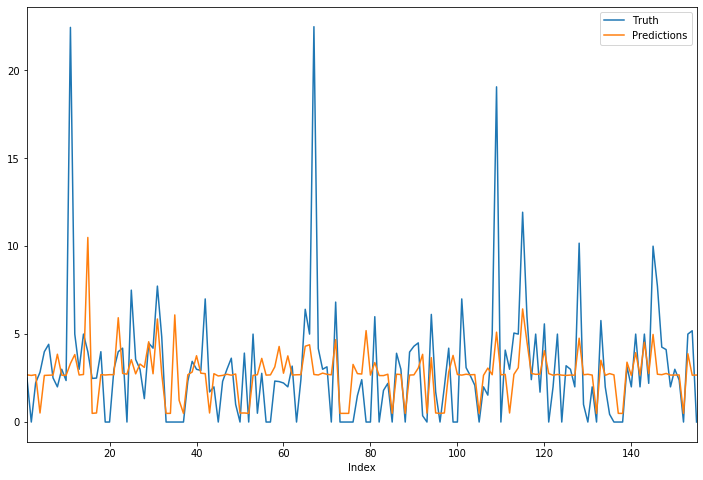

In [356]:
pred_frame[["Truth", "Predictions"]].plot(figsize=(12,8))

In [357]:
# Lets import a evaluation metric - For now we go for the Mean Abslute Error
from sklearn.metrics import mean_absolute_error

In [366]:
mae = mean_absolute_error(pred_frame["Truth"], pred_frame["Predictions"])
print(f"The Mean Absolute Error of our predictions is: {mae:.2f} €")

df_tip_mean = df.Tip.mean()
test_mean = y_test.mean()

print(f"The mean of the column Tip in our original dataframe is: {df_tip_mean:.2f} €")
print(f"The mean of the column Tip in our Testdata is: {test_mean:.2f} €")

The Mean Absolute Error of our predictions is: 1.89 €
The mean of the column Tip in our original dataframe is: 2.82 €
The mean of the column Tip in our Testdata is: 3.04 €


# Conclusion

As I said this was a short presentation of some Data Science approaches I use. If we have a look at our results you realize that our models predictions are not that good. This is because at this point we are usually not done with our work. 

But anyway, this is a huge part of Data Science. You have to test different models, you have to analyse the feature importance, you have to tune the models parameters (for example within the randomforestregressor sth. like "n_estimators" or "max_leafs"), you have to cross validate your data to prevent from overfitting and so on and so far.

All those steps have to be done to get the best model and its best results for the customer or our own company.

**I hope this helps you guys to get a short sense about my skills. I love to use functional or object oriented Programming within my final scripts to get my code nice and clean. But for now this workbook should give you a first impression**

**Hope to see you guys soon and wish you all the best**

**Dennis**